# Problem Statement

##### Given the following data set, use the sklearn package to find the co-efficients of the line that describes the following relationships:

1) x1 and y

2) x2 and y

3) x3 and y

Also, plot the line and the data using matplotlib and report the co-efficient of
determination for the lines using the metrics library.

In [7]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# this allows plots to appear directly in the notebook
%matplotlib inline

In [3]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head(15)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [4]:
# print the shape of the DataFrame
data.shape

(200, 4)

In [57]:
df = data[:15]
df.head(20)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


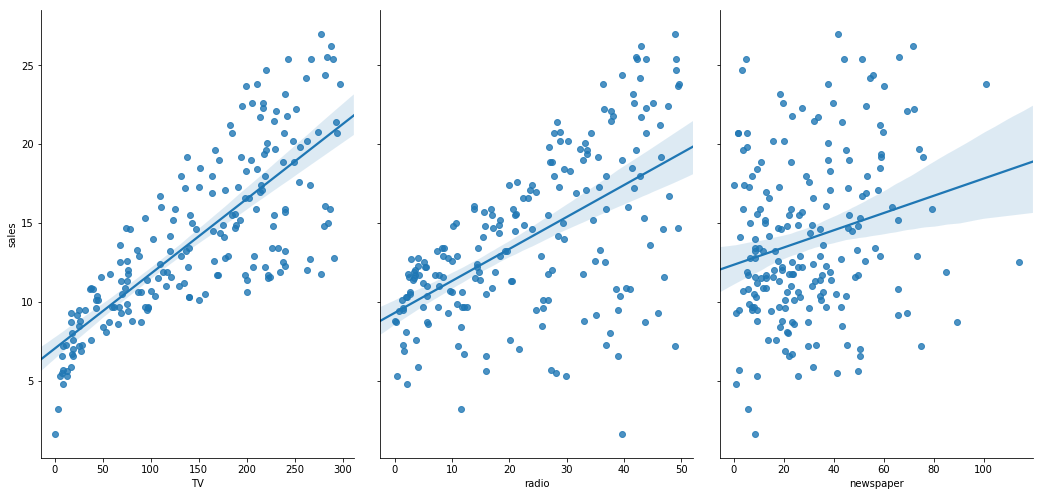

In [9]:
# visualize the relationship between the features
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [11]:
# list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

X = data[feature_cols]
X = data[['TV', 'radio', 'newspaper']]

In [12]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [16]:
X.shape

(200, 3)

In [19]:
y = data['sales']
y = data.sales

In [20]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [21]:
y.shape

(200,)

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [24]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [27]:
#Dataframe consisting of feature and coefficients
feat_coeff= pd.DataFrame({'features':X.columns,'estimated cofficients':linreg.coef_})
#feat_coeff.columns = ['features','estimated coefficients']
feat_coeff.head(15)

,features,estimated cofficients
0,TV,0.046565
1,radio,0.179158
2,newspaper,0.003450


Text(0,0.5,'sales')

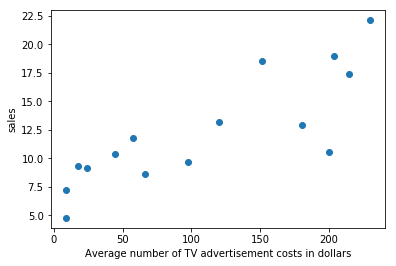

In [47]:
plt.scatter(df.TV,df.sales)
plt.xlabel('Average number of TV advertisement costs in dollars')
plt.ylabel('sales')

Text(0,0.5,'sales')

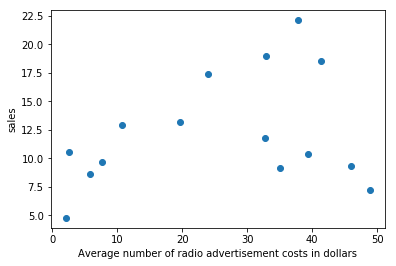

In [48]:
plt.scatter(df.radio,df.sales)
plt.xlabel('Average number of radio advertisement costs in dollars')
plt.ylabel('sales')

Text(0,0.5,'sales')

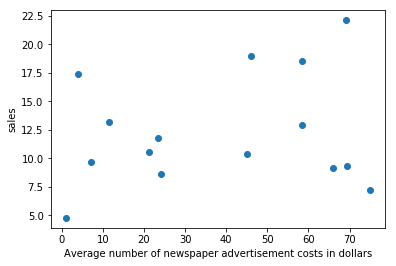

In [49]:
plt.scatter(df.newspaper,df.sales)
plt.xlabel('Average number of newspaper advertisement costs in dollars')
plt.ylabel('sales')

In [51]:
linreg.predict(X)

array([20.4990245 , 12.12139945, 12.04494085, 17.47020909, 13.30968011,
       12.19235973, 11.54956253, 12.07995868,  3.70849459, 12.70945193,
        7.05849368, 17.28107008, 10.39577671,  8.84793044, 18.39958364,
       20.67560124, 12.71804909, 23.21584784,  9.86630093, 14.12195436,
       18.12386323, 14.91464892,  6.42314373, 16.62848681,  8.11342601,
       15.81312127, 14.89527385, 17.14215851, 19.43186663,  9.11623605,
       21.70444537, 11.34116649,  7.72875423, 18.92841085,  7.64073276,
       17.21737409, 23.30106819, 15.35870402,  9.77329331, 20.38304162,
       16.40451622, 17.22725   , 21.62835925, 14.09117019,  8.75327159,
       15.163848  ,  8.90114524, 21.62609193, 16.37792668,  8.16473514,
       12.80004173,  9.34543641, 20.56717284, 19.80732189, 20.38764448,
       21.14671473,  8.35858094, 12.75312429, 21.73751851, 18.09114847,
        5.78282173, 22.84079753, 16.88746113, 13.07621364, 16.79129073,
        7.82776904,  8.85222902, 12.04604747, 18.97307179, 20.98

In [58]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [59]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [60]:
# calculate Mean Absolute Error by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [61]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [62]:
# calculate RMSE by hand
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [63]:
#Computing the RMSE for our Sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886


In [64]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.